<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [161]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    0,
    0,
    1,
    1,
    1,
    0
]

y_predictions = [
    0.5,
    0.1,
    0.2,
    0.6,
    0.2,
    0.3,
    0.0
]

roc_auc_score(y_true, y_predictions)

0.7916666666666666

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [162]:
data = pd.read_csv('./train.csv')

In [164]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [166]:
data.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [167]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [168]:
print(((data == ' ') | (data == '')).sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


In [169]:
data = data.replace(' ', 0)
data.TotalSpent = data.TotalSpent.astype(float)

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [171]:
# YOUR CODE

In [172]:
for col in num_cols:
    print(f'Колонка {col} - уникальные значение: {data[col].unique()} , количество: {len(data[col].unique())}')
    print()

Колонка ClientPeriod - уникальные значение: [55 72  1 32 60 25 27 50 16 70 69 26 38 30 52 71 59 61  7 20 48 22  2 21
 44 66 58 46 45  5  4  3 62  6 39 68 51 40 10 43 12 35 31 67  8 11 29 37
 33 14 15 47 23 65 13 41 53  9 64 42 34 17 18 63 56 54 24 28 49 19 57 36
  0] , количество: 73

Колонка MonthlySpending - уникальные значение: [ 19.5   25.85  75.9  ... 112.25 117.5   98.2 ] , количество: 1468

Колонка TotalSpent - уникальные значение: [1026.35 1872.2    75.9  ...   55.05 2215.25 1375.6 ] , количество: 4978



In [173]:
for col in cat_cols:
    print(f'Колонка {col} - уникальные значение: {data[col].unique()} , количество : {len(data[col].unique())}')
    print()

Колонка Sex - уникальные значение: ['Male' 'Female'] , количество : 2

Колонка IsSeniorCitizen - уникальные значение: [0 1] , количество : 2

Колонка HasPartner - уникальные значение: ['Yes' 'No'] , количество : 2

Колонка HasChild - уникальные значение: ['Yes' 'No'] , количество : 2

Колонка HasPhoneService - уникальные значение: ['Yes' 'No'] , количество : 2

Колонка HasMultiplePhoneNumbers - уникальные значение: ['No' 'Yes' 'No phone service'] , количество : 3

Колонка HasInternetService - уникальные значение: ['No' 'Fiber optic' 'DSL'] , количество : 3

Колонка HasOnlineSecurityService - уникальные значение: ['No internet service' 'No' 'Yes'] , количество : 3

Колонка HasOnlineBackup - уникальные значение: ['No internet service' 'No' 'Yes'] , количество : 3

Колонка HasDeviceProtection - уникальные значение: ['No internet service' 'No' 'Yes'] , количество : 3

Колонка HasTechSupportAccess - уникальные значение: ['No internet service' 'Yes' 'No'] , количество : 3

Колонка HasOnlineT

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

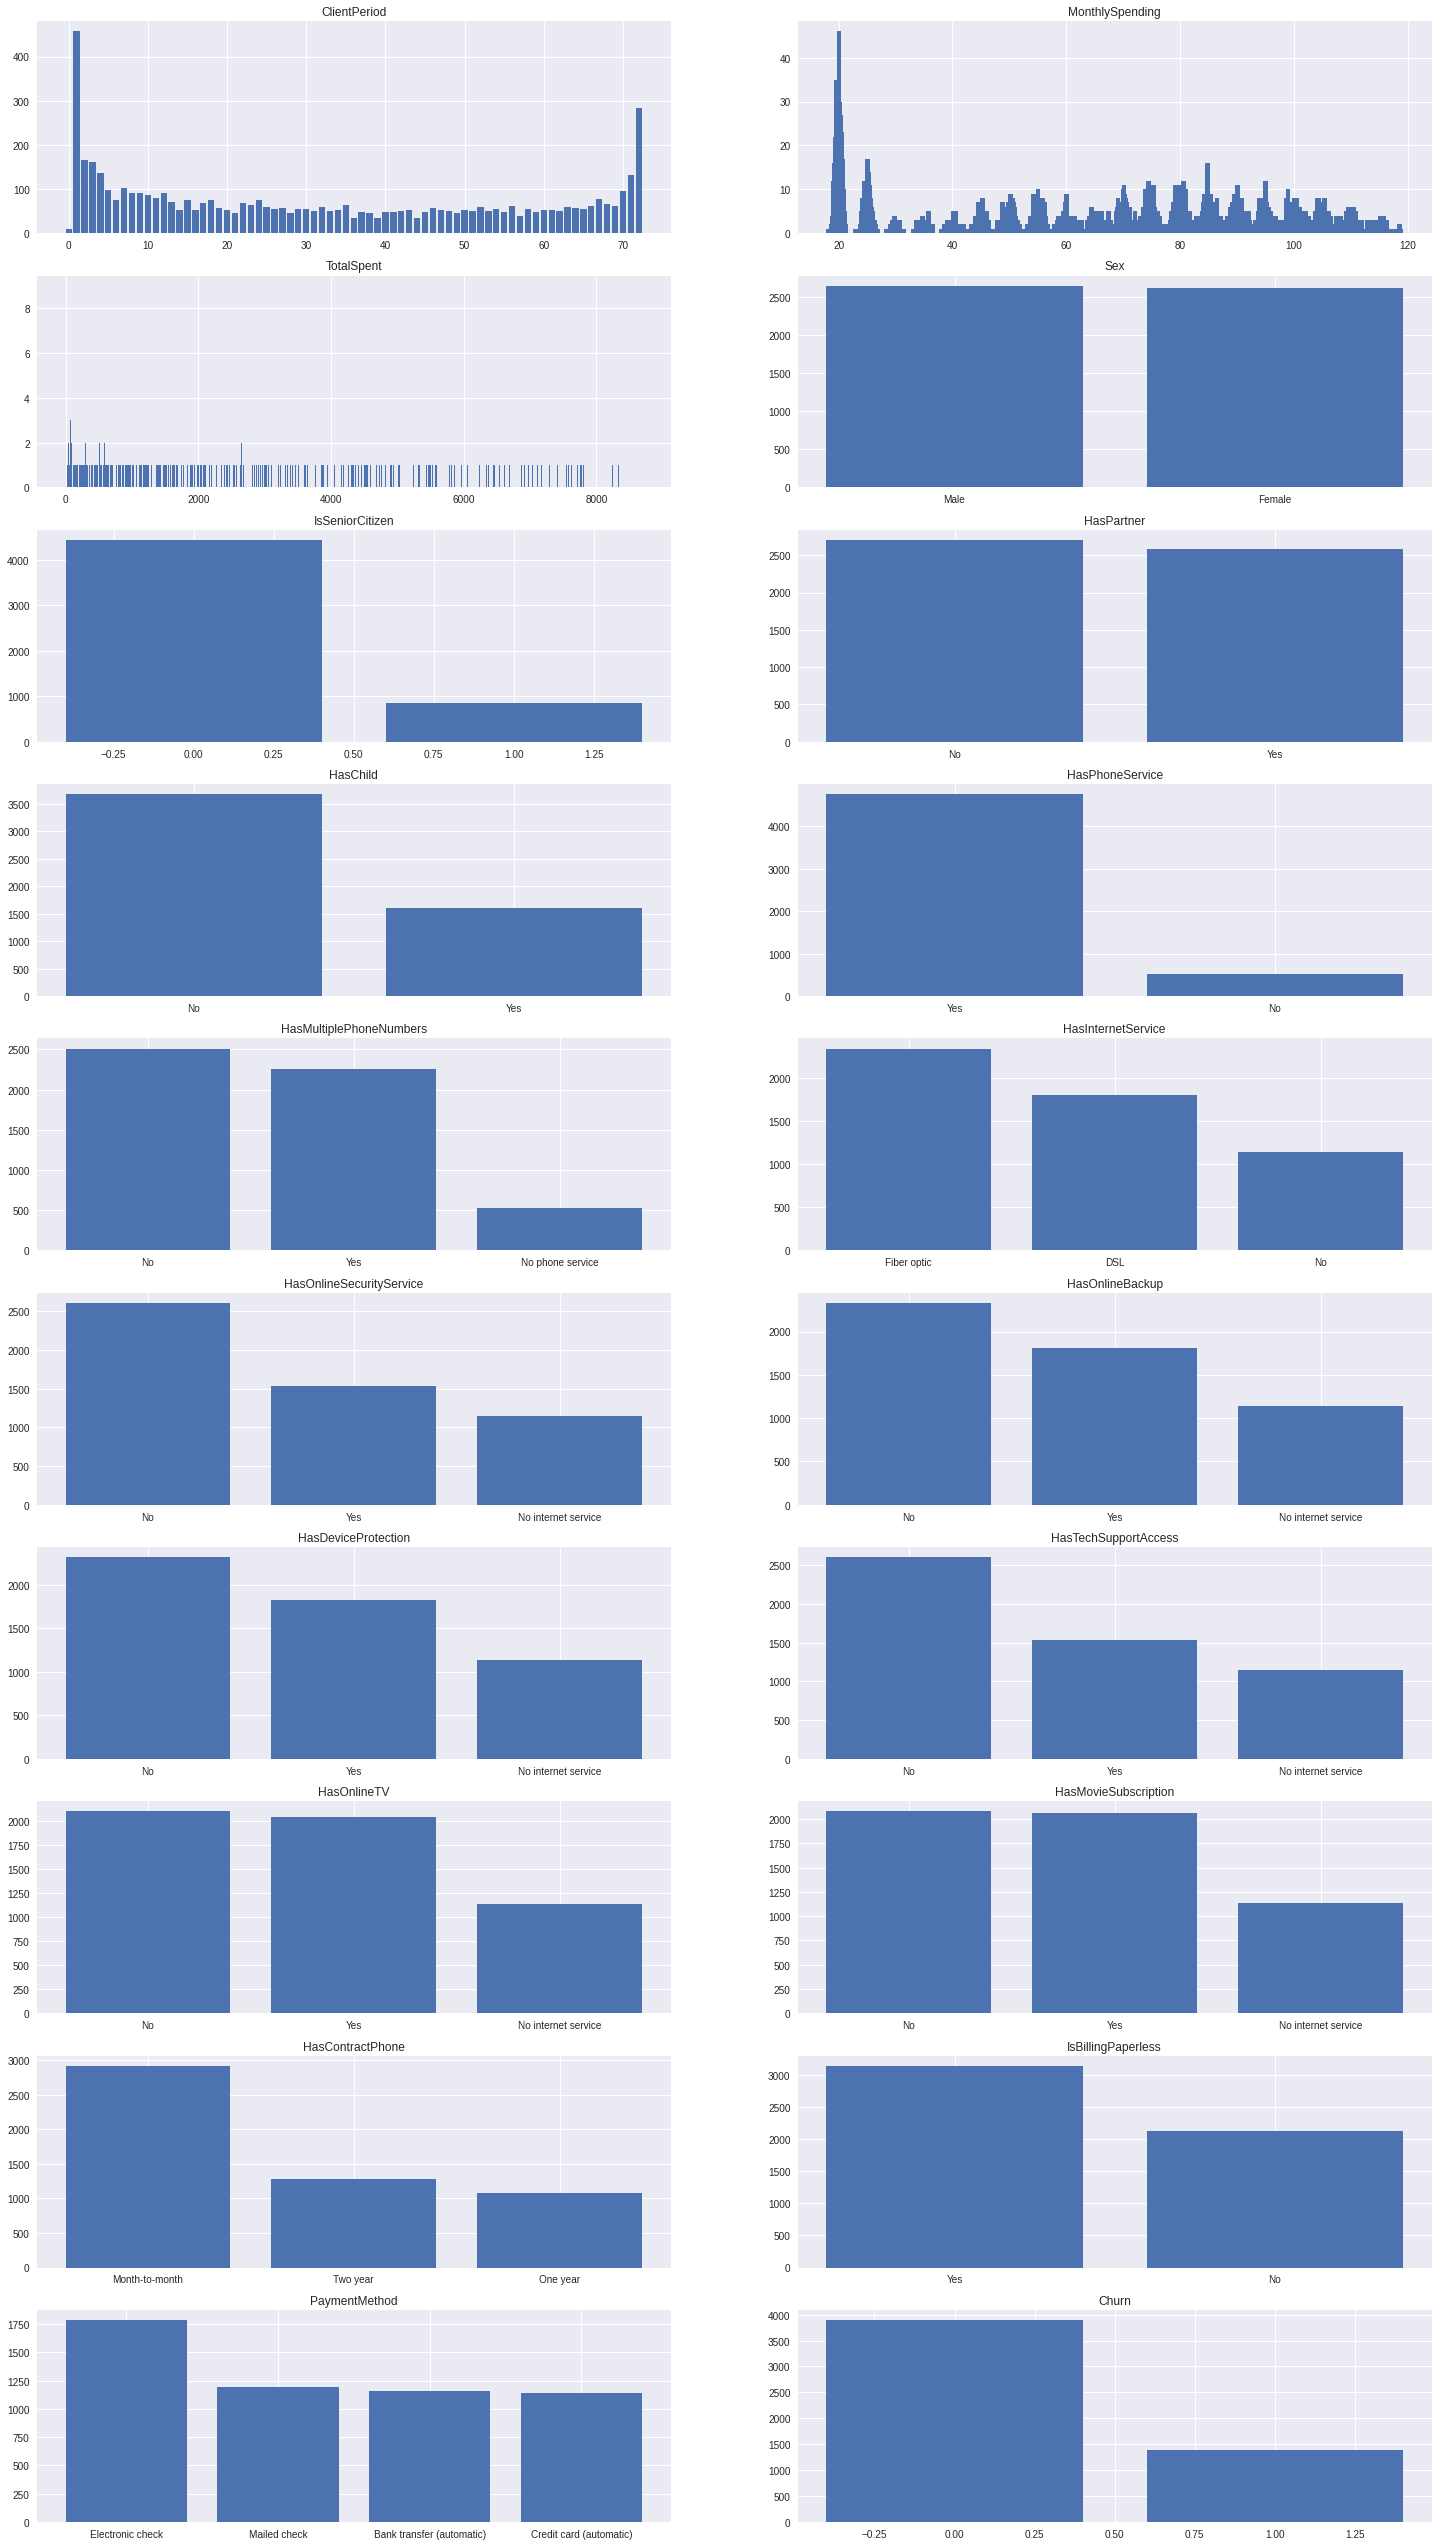

In [175]:
fig, ax = plt.subplots(10, 2, figsize=(25,46))
fig.subplots_adjust(wspace=0.2, hspace=0.2)
ax = ax.ravel()
for i,col in enumerate(list(data)):
    var = data[col]
    varValue = var.value_counts()
    ax[i].bar(varValue.index, varValue)
    ax[i].set_title(col)
    #ax[i].xticks(varValue.index, varValue.index.values)
    
fig.show()

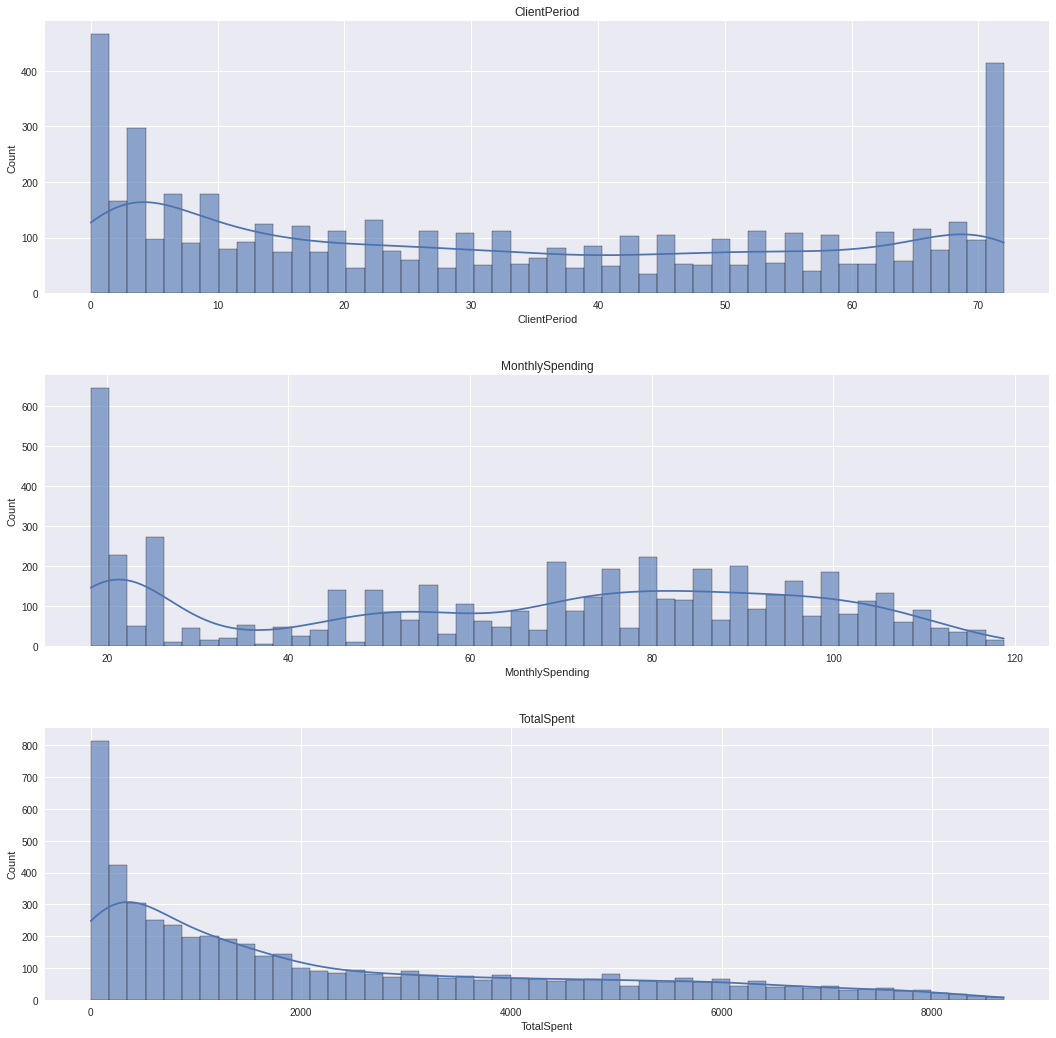

In [176]:
fig, ax = plt.subplots(3, 1, figsize=(18,18))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax = ax.ravel()
for i, col in enumerate(num_cols):
   sns.histplot(data[col],ax=ax[i], alpha=0.6, kde=True, bins=50)
   ax[i].set_title(col)
fig.show()   

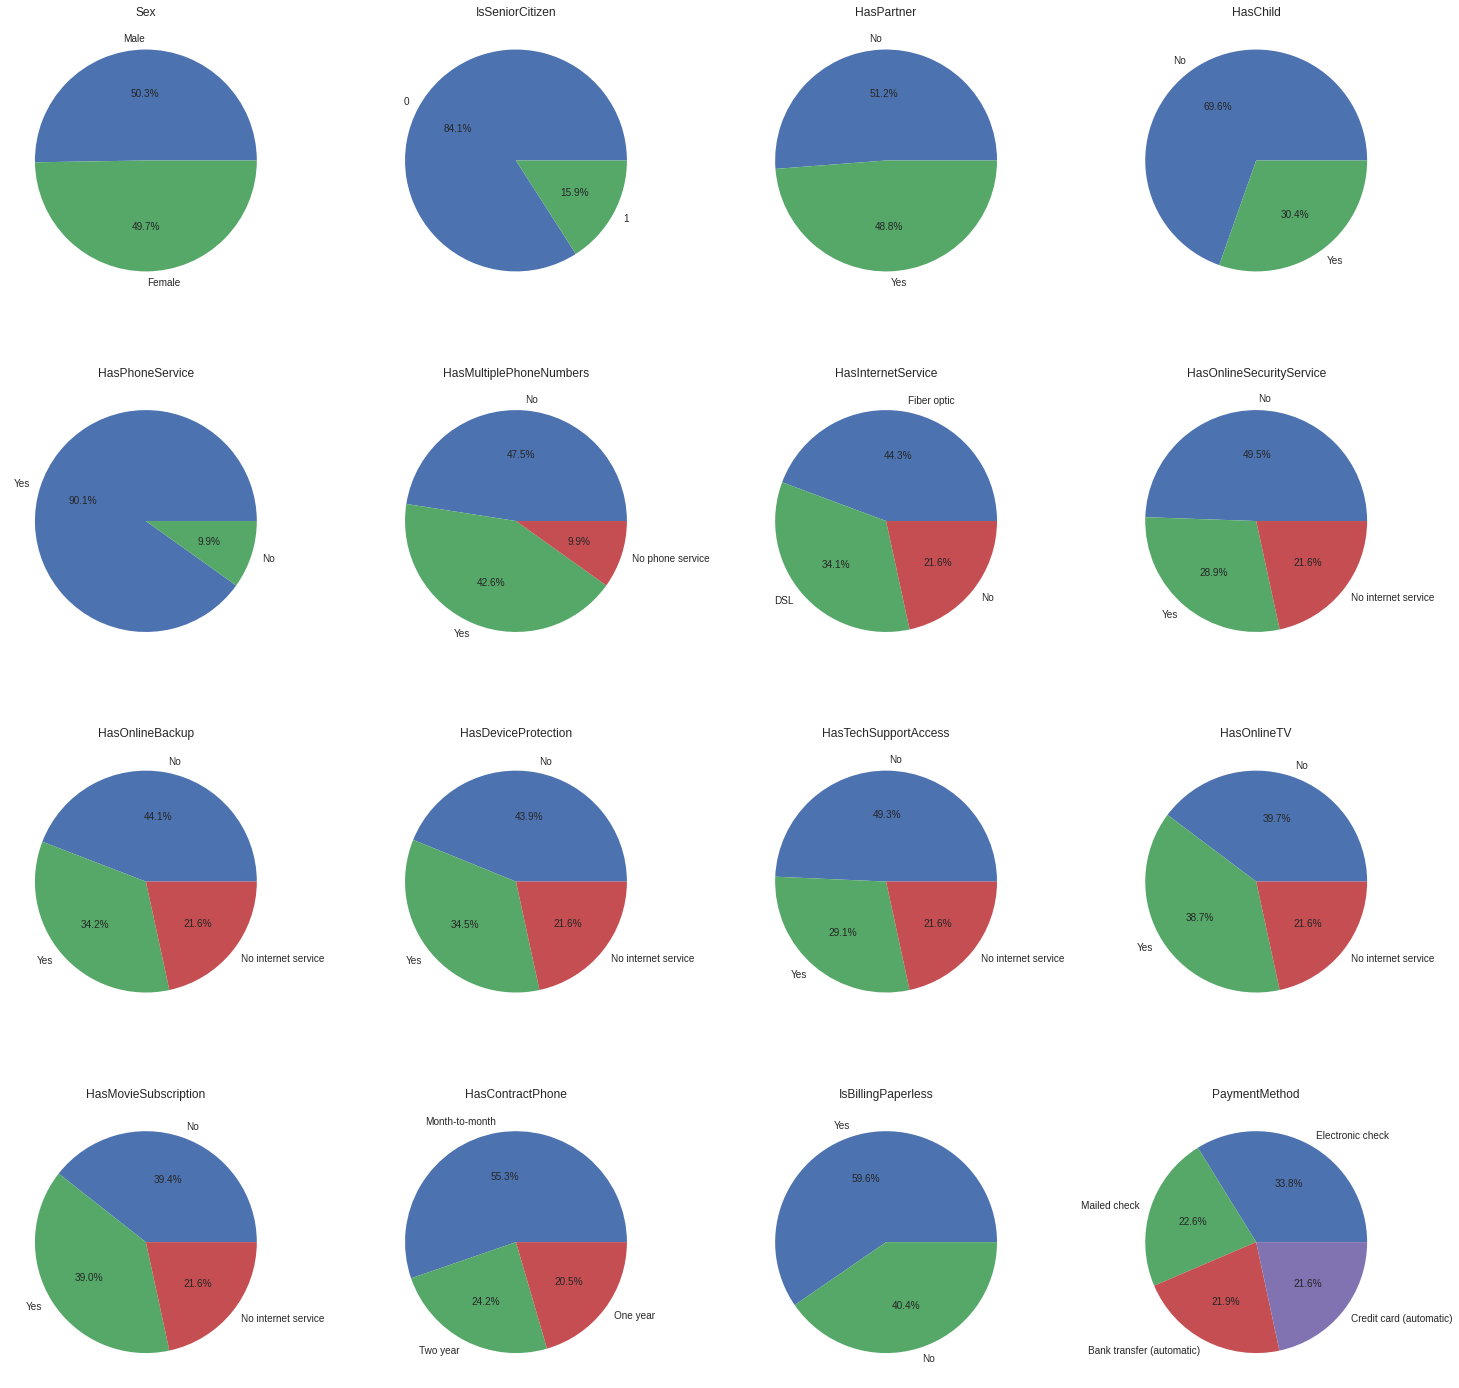

In [177]:
fig, ax = plt.subplots(4, 4, figsize=(25,25))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax = ax.ravel()
for i, col in enumerate(cat_cols):
   var = data[col]
   varValue = var.value_counts()
   ax[i].pie(varValue, labels = varValue.index,autopct = '%1.1f%%')#, explode=explode, shadow = True, autopct = '%1.1f%%')
   ax[i].set_title(col)
fig.show()   

**2.2**
</br>
*3 параметра не сбалансированы 'IsSeniorCitizen','HasPhoneService', 'HasMultiplePhoneNumbers' -   использовать accuracy как метрику не будем*


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [198]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [199]:
numeric_data = data[num_cols]
bin_cols = data.nunique()[(data.nunique() == 2)].index.tolist()
bin_cols.remove('Churn')
bin_data = data[bin_cols]
cat_cols2 = list(set(data.nunique().index.tolist()) - set(bin_cols + num_cols))
cat_cols2.remove('Churn')
categorial_data = data[cat_cols2]
dummy_features = pd.get_dummies(categorial_data)

In [200]:
num_cols

['ClientPeriod', 'MonthlySpending', 'TotalSpent']

In [201]:
bin_data

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,IsBillingPaperless
0,Male,0,Yes,Yes,Yes,No
1,Male,0,Yes,No,Yes,No
2,Male,0,No,No,Yes,Yes
3,Female,1,Yes,No,Yes,No
4,Female,0,Yes,Yes,Yes,No
...,...,...,...,...,...,...
5277,Male,0,No,No,No,No
5278,Male,0,Yes,No,No,Yes
5279,Male,0,No,No,Yes,No
5280,Female,0,No,No,Yes,Yes


In [202]:
X = pd.concat([numeric_data, bin_data, dummy_features], axis=1)
X_origin = data.iloc[:, :-1]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,IsBillingPaperless,HasOnlineTV_No,...,HasDeviceProtection_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,0,...,0,1,0,0,0,1,0,0,1,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,No,0,...,0,0,0,1,0,1,0,0,1,0
2,1,75.90,75.90,Male,0,No,No,Yes,Yes,1,...,0,1,0,0,1,0,0,1,0,0
3,32,79.30,2570.00,Female,1,Yes,No,Yes,No,1,...,1,0,0,1,1,0,0,1,0,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,No,0,...,1,0,0,1,0,0,1,0,0,1


In [203]:
X[bin_cols] = X[bin_cols].apply(LabelEncoder().fit_transform)

In [204]:
y = data['Churn']

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [206]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [207]:
C = [100, 10, 1, 0.1, 0.01, 0.001]
clf = LogisticRegressionCV(Cs = C, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42, refit=True)
clf.fit(X_train_scaled,y_train)

LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], cv=5, n_jobs=-1,
                     random_state=42, scoring='roc_auc')

In [208]:
best_C = clf.C_[0]
print(best_C)

100.0


In [209]:
pred_train = clf.predict_proba(X_train_scaled)[:, 1]
pred_test =  clf.predict_proba(X_test_scaled )[:, 1]

In [210]:
from sklearn.metrics import roc_auc_score, roc_curve
train_auc = roc_auc_score(y_train, pred_train)
test_auc = roc_auc_score(y_test, pred_test)
print('train:',train_auc)
print('test:',test_auc)

train: 0.8538362553027672
test: 0.8268071037393449


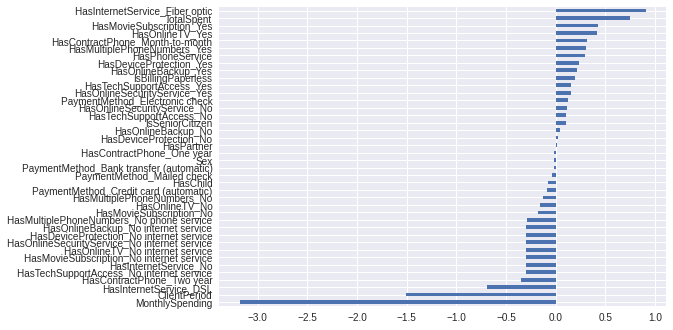

In [211]:
coefs1 = clf.coef_
coefs1_series = pd.Series(coefs1.ravel(), index=list(X))
coefs1_series.sort_values().plot(kind="barh")

In [212]:
coefs1_series

ClientPeriod                                   -1.502793
MonthlySpending                                -3.180669
TotalSpent                                      0.744182
Sex                                            -0.017531
IsSeniorCitizen                                 0.103681
HasPartner                                      0.017888
HasChild                                       -0.074493
HasPhoneService                                 0.292926
IsBillingPaperless                              0.194108
HasOnlineTV_No                                 -0.156488
HasOnlineTV_No internet service                -0.300599
HasOnlineTV_Yes                                 0.412537
HasMovieSubscription_No                        -0.175572
HasMovieSubscription_No internet service       -0.300599
HasMovieSubscription_Yes                        0.430780
HasTechSupportAccess_No                         0.105522
HasTechSupportAccess_No internet service       -0.300599
HasTechSupportAccess_Yes       

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [135]:
!pip install catboost
import catboost

In [237]:
X_train, X_val, y_train, y_val = train_test_split(X_origin, y, 
                                                       train_size=0.8, 
                                                       random_state=42, stratify=y)

In [240]:
boost_model = catboost.CatBoostClassifier(n_estimators=300, cat_features=cat_cols)
boost_model.fit(X_train, y_train)
y_train_pred = boost_model.predict_proba(X_train)[:, 1]
y_valid_pred = boost_model.predict_proba(X_val)[:, 1]
roc_auc_score(y_train, y_train_pred), roc_auc_score(y_val, y_valid_pred)

Learning rate set to 0.057497
0:	learn: 0.6569388	total: 36.8ms	remaining: 11s
1:	learn: 0.6273657	total: 84.1ms	remaining: 12.5s
2:	learn: 0.6015579	total: 154ms	remaining: 15.2s
3:	learn: 0.5789777	total: 201ms	remaining: 14.9s
4:	learn: 0.5578598	total: 266ms	remaining: 15.7s
5:	learn: 0.5428486	total: 281ms	remaining: 13.8s
6:	learn: 0.5309634	total: 299ms	remaining: 12.5s
7:	learn: 0.5156581	total: 326ms	remaining: 11.9s
8:	learn: 0.5039855	total: 356ms	remaining: 11.5s
9:	learn: 0.4945279	total: 393ms	remaining: 11.4s
10:	learn: 0.4846770	total: 442ms	remaining: 11.6s
11:	learn: 0.4796473	total: 457ms	remaining: 11s
12:	learn: 0.4724553	total: 492ms	remaining: 10.9s
13:	learn: 0.4662112	total: 522ms	remaining: 10.7s
14:	learn: 0.4616736	total: 560ms	remaining: 10.6s
15:	learn: 0.4556124	total: 634ms	remaining: 11.3s
16:	learn: 0.4511798	total: 693ms	remaining: 11.5s
17:	learn: 0.4471461	total: 715ms	remaining: 11.2s
18:	learn: 0.4430854	total: 747ms	remaining: 11s
19:	learn: 0.44

(0.8881731392682752, 0.8543437008238451)

In [241]:
params = {'depth' : [4,5,6,7,8,9, 10],
          'learning_rate' : [0.01,0.02,0.03,0.04],
          'iterations': [10, 20,30,40,50,60,70,80,90,100]
                 }
boost_model = catboost.CatBoostClassifier(cat_features=cat_cols, random_seed=1, verbose=False)
result = boost_model.grid_search(params, X_train, y_train)


bestTest = 0.6447423117
bestIteration = 9

0:	loss: 0.6447423	best: 0.6447423 (0)	total: 114ms	remaining: 31.8s

bestTest = 0.6052220081
bestIteration = 9

1:	loss: 0.6052220	best: 0.6052220 (1)	total: 212ms	remaining: 29.5s

bestTest = 0.5744265834
bestIteration = 9

2:	loss: 0.5744266	best: 0.5744266 (2)	total: 309ms	remaining: 28.6s

bestTest = 0.5510838759
bestIteration = 9

3:	loss: 0.5510839	best: 0.5510839 (3)	total: 418ms	remaining: 28.8s

bestTest = 0.6067397784
bestIteration = 19

4:	loss: 0.6067398	best: 0.5510839 (3)	total: 582ms	remaining: 32s

bestTest = 0.5479968449
bestIteration = 19

5:	loss: 0.5479968	best: 0.5479968 (5)	total: 773ms	remaining: 35.3s

bestTest = 0.5080892132
bestIteration = 19

6:	loss: 0.5080892	best: 0.5080892 (6)	total: 967ms	remaining: 37.7s

bestTest = 0.4823583703
bestIteration = 19

7:	loss: 0.4823584	best: 0.4823584 (7)	total: 1.16s	remaining: 39.4s

bestTest = 0.5752385194
bestIteration = 29

8:	loss: 0.5752385	best: 0.4823584 (7)	total: 1.4

In [242]:
pd.DataFrame([[
    roc_auc_score(y_train, boost_model.predict_proba(X_train)[:, 1]),
    roc_auc_score(y_val, boost_model.predict_proba(X_val)[:, 1]),
    result['params'],
]])

,0,1,2
0,0.861979,0.852698,"{'depth': 8, 'iterations': 100, 'learning_rate..."


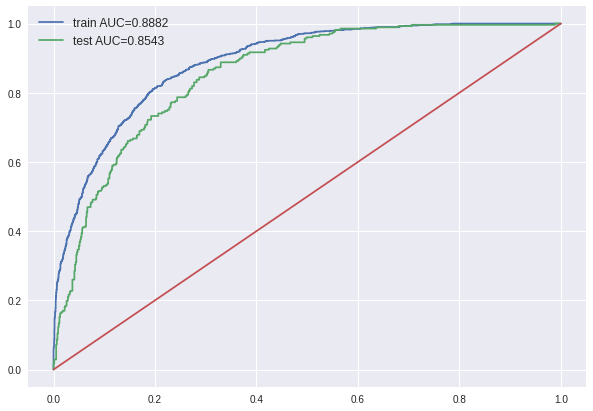

In [243]:
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_val, y_valid_pred)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_pred)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_val, y_valid_pred)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [244]:
print(f'лучшее качество: {roc_auc_score(y_val, boost_model.predict_proba(X_val)[:, 1])}, с параметрами: { result["params"]}')

лучшее качество: 0.8526983245394798, с параметрами: {'depth': 8, 'iterations': 100, 'learning_rate': 0.04}


# Предсказания

In [245]:
#best_model = boost_model.predict_proba(cb_test)[:,-1]

In [246]:
tests = pd.read_csv('./test.csv')
#X_test = X_test.replace(' ', 0)
#X_test.TotalSpent = X_test.TotalSpent.astype(float)
y_pred = boost_model.predict_proba(tests)[:,-1]
submission = pd.read_csv('./submission.csv', index_col='Id')
submission['Churn'] = y_pred
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.